# Figure 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import replay_structure.metadata as meta
import replay_structure.read_write as read_write
from replay_structure.utils import get_marginal_sum, get_p_models
import importlib

In [2]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["axes.linewidth"] = 1
small_axislabel_fontsize=5

### Load data (marginals, map trajectories, model comparison results) for plotting rat1day1 examples

In [3]:
session = meta.Session_List[0]

# load position marginals
spikemat_list = np.arange(322)
ripple_marginals = dict()
for spikemat_ind in spikemat_list:
    ripple_marginals[spikemat_ind] = read_write.load_marginals(
        session, spikemat_ind, meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function)
    
# load model comparison results
mc_results = read_write.load_model_comparison_results(session, meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function)

# load Pfeiffer & Foster (2013) classification
rd = read_write.load_ratday_data(session)
pf_trajectories = rd.data['significant_ripples']

# load my own implementation of Pfeiffer & Foster (2013) trajectory extraction
decoding_type = 'map'
pf_analysis = read_write.load_pf_analysis(session, meta.Ripples_PF_Data.default_time_window_ms, meta.Ripples_PF_Data.name, decoding_type)
pf_trajectories = np.array([i for i in range(len(pf_analysis.results['significant_trajectory'])) if pf_analysis.results['significant_trajectory'][i]])

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ratday/rat1day1_4cm.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples_pf/rat1day1_4cm_20ms_pf_analysis_map.obj


/Users/emmakrause/Documents/PhD/Lab/replay_structure/replay_structure/utils.py:301: RuntimeWarning: invalid value encountered in true_divide
  marginal_norm = marginals / np.sum(marginals, axis=0)


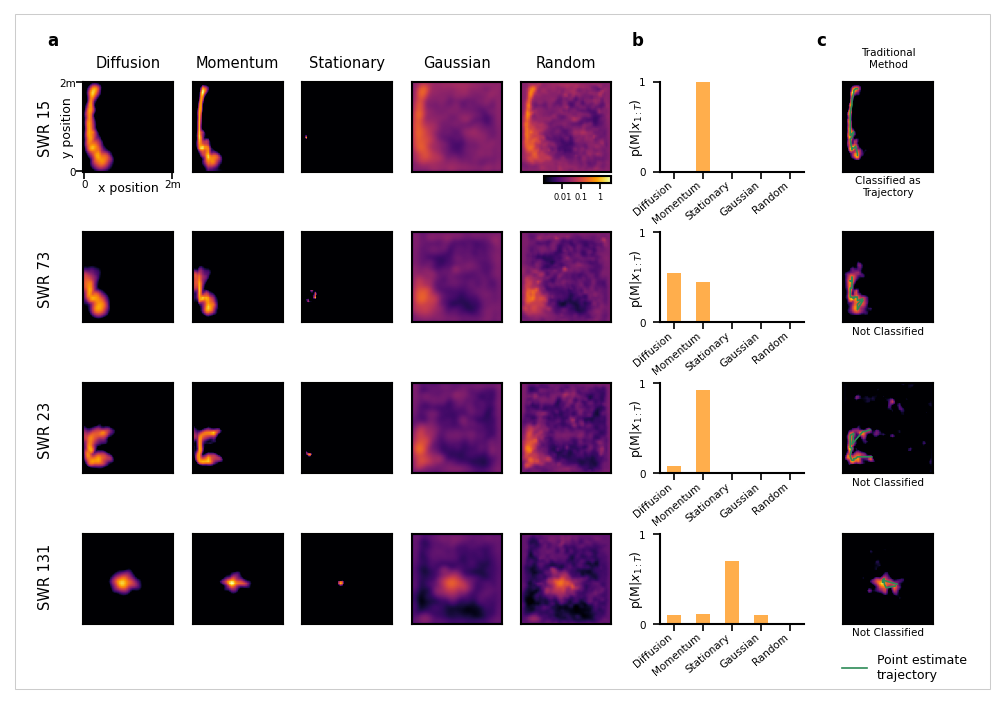

In [4]:
ripples_plot = [15, 73, 23, 131]
n_ripples_plot = len(ripples_plot)

figure_width = 6.5
figure_height = 4.5
left_margin = 0.07
header_height = 0.1

imshow_height = 1 / figure_height * 0.6
imshow_width = 1 / figure_width * 0.6
barplot_height = 1 / figure_height * 0.6
barplot_width = 1.6 / figure_width * 0.6

w_spacing = 0.02
h_spacing = 0.09

title_padding = 7

model_names = ["Diffusion", "Momentum", "Stationary", "Gaussian", "Random"]

fig = plt.figure(
    figsize=(figure_width, figure_height), dpi=150, facecolor="w", edgecolor="k"
)


# add marginals
ax = dict()
for i in range(meta.N_MODELS):
    for j in range(n_ripples_plot):

        left = left_margin + (imshow_width * i) + w_spacing * i
        bottom = 1 - header_height - imshow_height * (j + 1) - h_spacing * j

        ax[i, j] = fig.add_axes([left, bottom, imshow_width, imshow_height])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        for axis in ['top','bottom','left','right']:
            ax[i,j].spines[axis].set_linewidth(1)

        if j == 0:
            ax[i, j].set_title(model_names[i], pad=title_padding, fontsize=7)

        if (i == 0) & (j == 0):
            ax[i, j].set_xticks([0, 49])
            ax[i, j].set_yticks([0, 49])
            ax[i, j].set_xticklabels(["0", "2m"])
            ax[i, j].set_yticklabels(["0", "2m"])
            ax[i, j].set_xlabel("x position", labelpad=-4)
            ax[i, j].set_ylabel("y position", labelpad=-7)
            ax[i, j].tick_params(axis="both", pad=0.08)
            
        if (i == (meta.N_MODELS-1)) &( j == (0)):
            im = ax[i,j].imshow(get_marginal_sum(ripple_marginals[ripples_plot[j]].marginals[meta.MODELS_AS_STR[i]]),
                          aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4))
            
            axins1 = inset_axes(ax[i,j],
                    width="75%",  
                    height="8%",  
                    loc='lower right',
                    bbox_to_anchor=(0, -.13, 1, 1),
                    bbox_transform=ax[i,j].transAxes,
                    borderpad=0)

            cbar = fig.colorbar(im, cax=axins1, orientation="horizontal", ticks=np.log([.01, .1, 1]))
            cbar.ax.set_xticklabels(['0.01', '0.1', '1'])
            cbar.ax.tick_params(pad=1, length=3)
            
            
            axins1.set_frame_on(True)
            for axis in ['top','bottom','left','right']:
                axins1.spines[axis].set_linewidth(0.5)

            axins1.xaxis.set_ticks_position("bottom")
            axins1.tick_params(labelsize=4)
        
        else:
            ax[i,j].imshow(get_marginal_sum(ripple_marginals[ripples_plot[j]].marginals[meta.MODELS_AS_STR[i]]),
                          aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4))
        

# add model probabilities
for j in range(n_ripples_plot):
    left = left_margin + (imshow_width * meta.N_MODELS) + w_spacing * meta.N_MODELS + .03
    bottom = 1 - header_height - imshow_height * (j + 1) - h_spacing * j
    
    x_ticks = np.arange(meta.N_MODELS) + .5

    ax[meta.N_MODELS, j] = fig.add_axes([left, bottom, barplot_width, barplot_height])
    ax[meta.N_MODELS, j].set_xticks(x_ticks)
    ax[meta.N_MODELS, j].set_xticklabels(
        model_names, fontsize=small_axislabel_fontsize, rotation=40, ha="right"  # position=(-1, 0.04)
    )
    ax[meta.N_MODELS, j].tick_params(axis="x", pad=0.08)
    ax[meta.N_MODELS, j].set_yticks([])
    ax[meta.N_MODELS, j].set_ylabel('p(M|$x_{1:T}$)', labelpad=-3)
    ax[meta.N_MODELS, j].spines["right"].set_visible(False)
    ax[meta.N_MODELS, j].spines["top"].set_visible(False)
    ax[meta.N_MODELS, j].set_ylim([0,1])
    ax[meta.N_MODELS, j].set_yticks([0,1])
    ax[meta.N_MODELS, j].set_yticklabels([0,1])
    
    
    ripple_p_models = get_p_models(mc_results.results_dataframe[meta.MODELS_AS_STR].iloc[ripples_plot[j]].values)
    ax[meta.N_MODELS, j].bar(x_ticks, ripple_p_models, width=.5, color='darkorange', alpha=.7)

# add Pfeiffer & Foster (2013) method
i = meta.N_MODELS + 1
for j in range(n_ripples_plot):
    left = (
        left_margin
        + (imshow_width * (meta.N_MODELS) + barplot_width)
        + w_spacing * (meta.N_MODELS + 1) + .03 + .02
    )
    bottom = 1 - header_height - imshow_height * (j + 1) - h_spacing * j
    ax[i, j] = fig.add_axes([left, bottom, imshow_width, imshow_height])
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    
    for axis in ['top','bottom','left','right']:
                ax[i,j].spines[axis].set_linewidth(1)


    if j == 0:
        ax[i, j].set_title("Traditional\nMethod", pad=title_padding)
        
    posteriors_plot = np.exp(pf_analysis.results["posteriors"][ripples_plot[j]])[:,pf_analysis.results['trajectory_start_ind'][ripples_plot[j]]:pf_analysis.results['trajectory_end_ind'][ripples_plot[j]]]
    ax[i,j].imshow(get_marginal_sum(posteriors_plot),
                      aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4))
    ax[i,j].plot(pf_analysis.results['trajectory_map_positions'][ripples_plot[j]][:,1]/4,
                pf_analysis.results['trajectory_map_positions'][ripples_plot[j]][:,0]/4,
                color='seagreen', linewidth=.8, linestyle='-', label='Point estimate\ntrajectory')
    if pf_analysis.results["significant_trajectory"][ripples_plot[j]]:
        ax[i,j].set_xlabel("Classified as\nTrajectory", labelpad=1.8, fontsize=5)
    else:
        ax[i,j].set_xlabel("Not Classified", labelpad=1.8, fontsize=5)
    if j == (n_ripples_plot-1):
        ax[i,j].legend(frameon=False, fontsize=6, bbox_to_anchor=(1.5,-.2,0,0))
    
    
ax[0,0].text(-.4,1.4, "a", size=8, transform=ax[0,0].transAxes, fontweight='bold')
ax[5,0].text(-.2,1.4, "b", size=8, transform=ax[5,0].transAxes, fontweight='bold')
ax[6,0].text(-.3,1.4, "c", size=8, transform=ax[6,0].transAxes, fontweight='bold')

for i in range(n_ripples_plot):
    ax[0,i].text(-.5,.2, f"SWR {ripples_plot[i]}", size=7, transform=ax[0,i].transAxes, rotation=90)


plt.savefig(os.path.join(meta.FIGURES_PATH, "Figure2.svg"), dpi=300, transparent=True)

rect = plt.Rectangle(
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])